# Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Data Import

In [3]:
data=pd.read_csv('crop_yield.csv')

In [4]:
data.shape

(19689, 10)

In [5]:
data=data[data['Yield']!=0]

In [6]:
data.shape

(19577, 10)

In [7]:
data.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


## Data Description

**Columns Description**:
- Crop: The name of the crop cultivated.
- Crop_Year: The year in which the crop was grown.
- Season: The specific cropping season (e.g., Kharif, Rabi, Whole Year).
- State: The Indian state where the crop was cultivated.
- Area: The total land area (in hectares) under cultivation for the specific crop.
- Production: The quantity of crop production (in metric tons).
- Annual_Rainfall: The annual rainfall received in the crop-growing region (in mm).
- Fertilizer: The total amount of fertilizer used for the crop (in kilograms).
- Pesticide: The total amount of pesticide used for the crop (in kilograms).
- Yield: The calculated crop yield (production per unit area).

# Data Exploration

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19577 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19577 non-null  object 
 1   Crop_Year        19577 non-null  int64  
 2   Season           19577 non-null  object 
 3   State            19577 non-null  object 
 4   Area             19577 non-null  float64
 5   Production       19577 non-null  int64  
 6   Annual_Rainfall  19577 non-null  float64
 7   Fertilizer       19577 non-null  float64
 8   Pesticide        19577 non-null  float64
 9   Yield            19577 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.6+ MB


In [9]:
data.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [10]:
data.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19577.000000,1.957700e+04,1.957700e+04,19577.000000,1.957700e+04,1.957700e+04,19577.000000
mean,2009.117945,1.809265e+05,1.652997e+07,1438.450010,2.423721e+07,4.911903e+04,80.411426
std,6.499877,7.348001e+05,2.638053e+08,816.525914,9.520033e+07,2.138658e+05,880.794251
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.003571
25%,2004.000000,1.439000e+03,1.448000e+03,940.700000,1.935634e+05,3.696300e+02,0.604348
50%,2010.000000,9.501000e+03,1.408200e+04,1247.600000,1.258710e+06,2.473450e+03,1.037273
75%,2015.000000,7.599300e+04,1.244600e+05,1643.700000,1.013409e+07,2.021619e+04,2.410000
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [11]:
for col in data.columns:
    if data[col].dtype=='object':
        print(col,data[col].nunique())

Crop 55
Season 6
State 30


# EDA

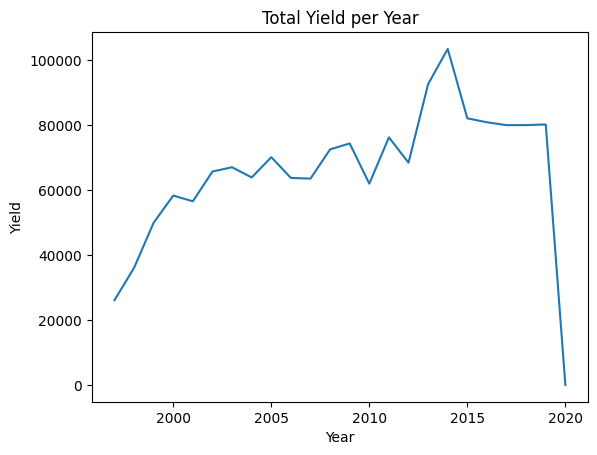

In [12]:
data.groupby(['Crop_Year'])['Yield'].sum().plot()
plt.title('Total Yield per Year')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.show()

From this **Total Yield per Year** graph we can say that as the year increases till 2015 the **Yield** is increasing year by year and after that there is a sudden drop in Yield. 

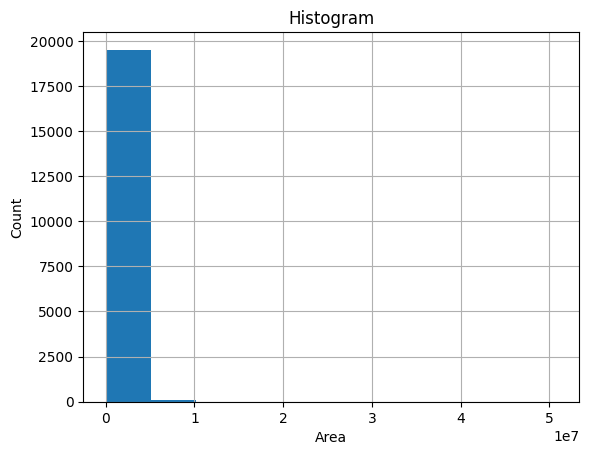

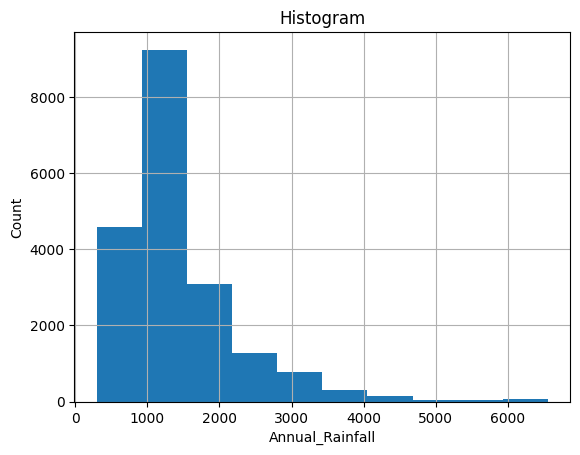

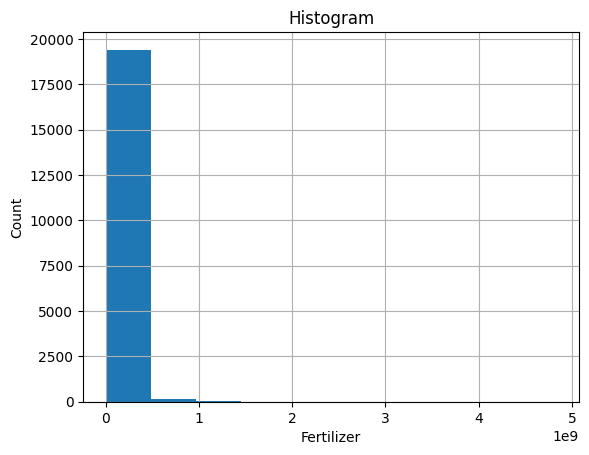

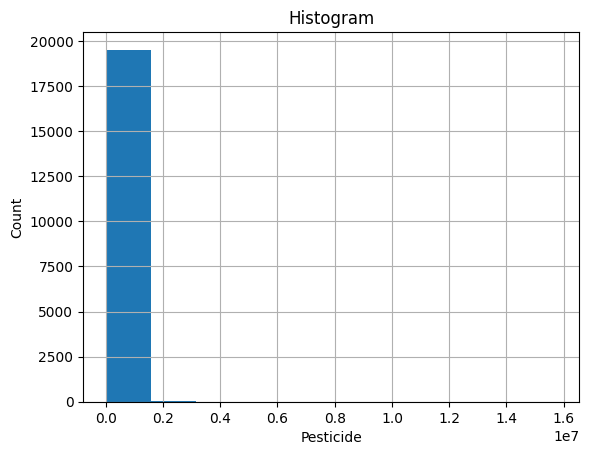

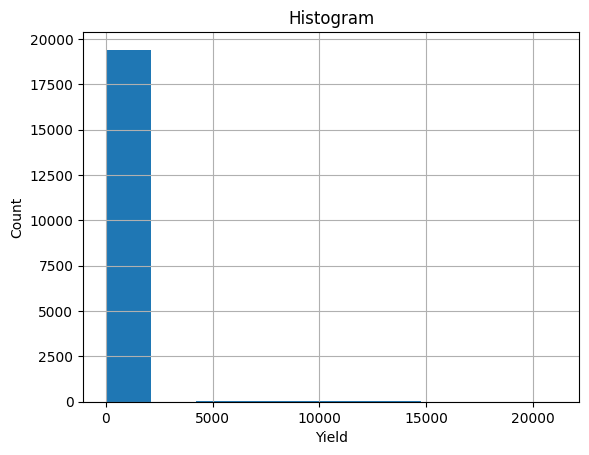

In [13]:
for i in data.columns:
    if data[i].dtypes=='float64':
        plt.hist(data[i],bins=10)
        plt.title('Histogram')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.grid()
        plt.show()

From these Histograms we can see that all of the continous variables are **Highly Skewed towards Right**.

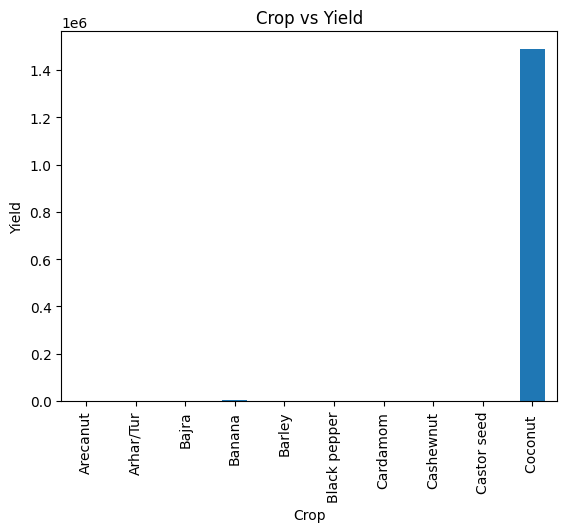

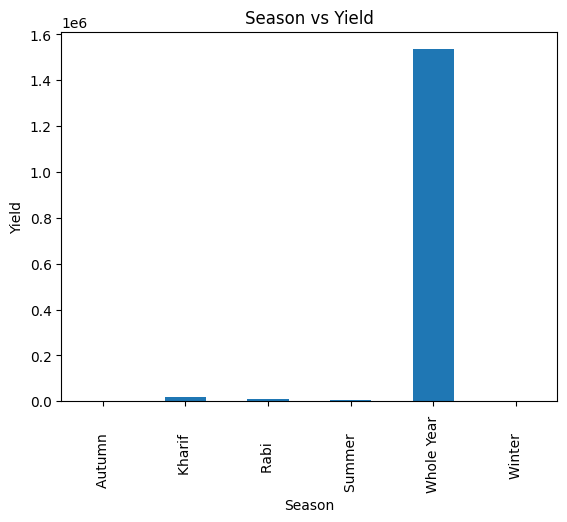

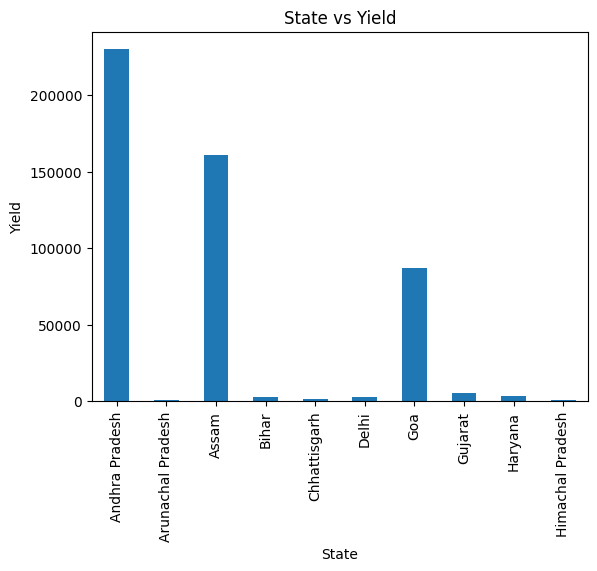

In [14]:
for i in data.columns:
    if data[i].dtypes=='O':
        data.groupby([i])['Yield'].sum().head(10).plot.bar()
        plt.title(f'{i} vs Yield')
        plt.xlabel(i)
        plt.ylabel('Yield')
        plt.show()

From this we can see:
- There highest **Production** of **Coconut**
- The **Season** for highest Production is **Whole Year**
- The highest producing **States** are **Andhra Pradesh,Assam and Goa**

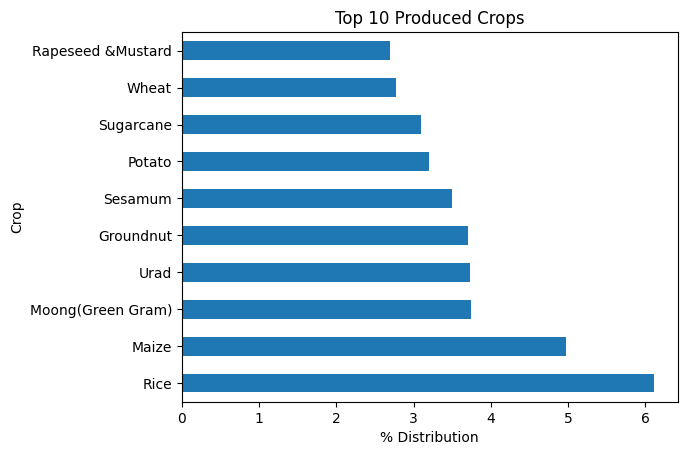

In [15]:
((data['Crop'].value_counts()/data.shape[0])*100)[:10].plot(kind='barh')
plt.title('Top 10 Produced Crops')
plt.xlabel('% Distribution')
plt.show()

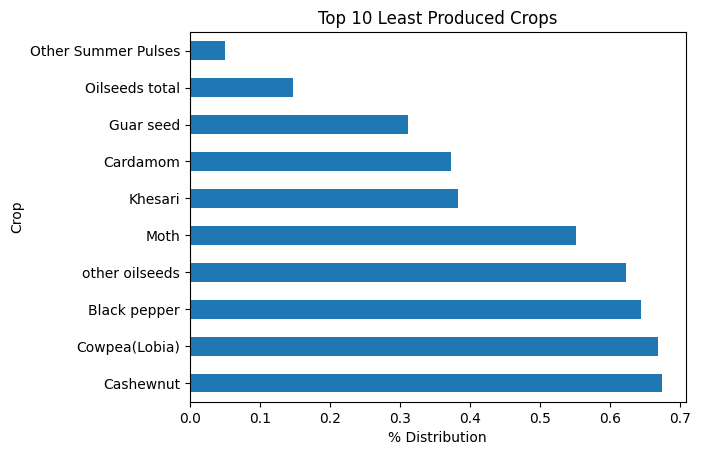

In [16]:
((data['Crop'].value_counts()/data.shape[0])*100)[-10:].plot(kind='barh')
plt.title('Top 10 Least Produced Crops')
plt.xlabel('% Distribution')
plt.show()

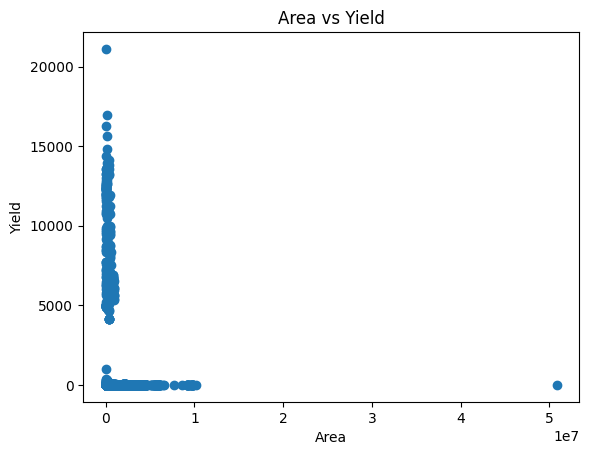

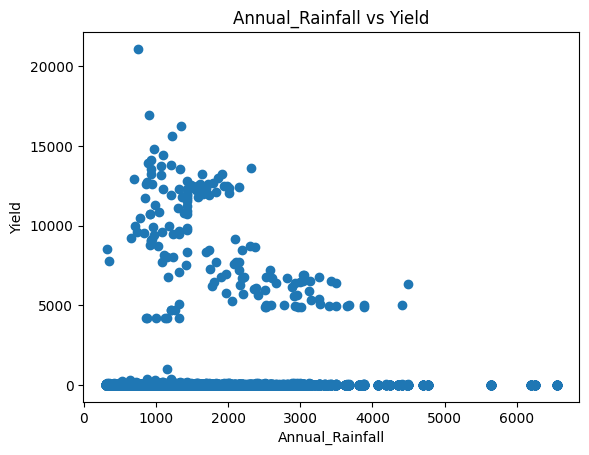

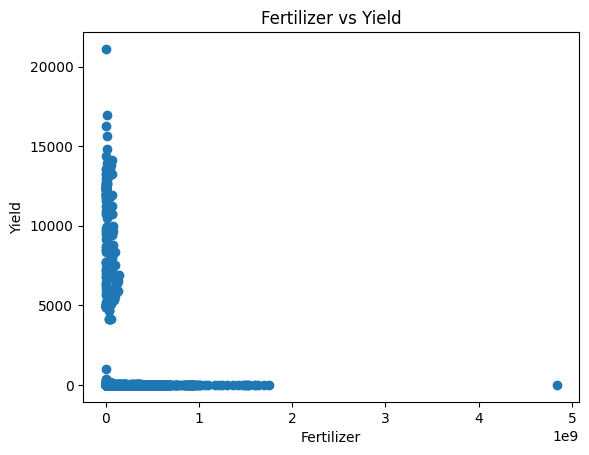

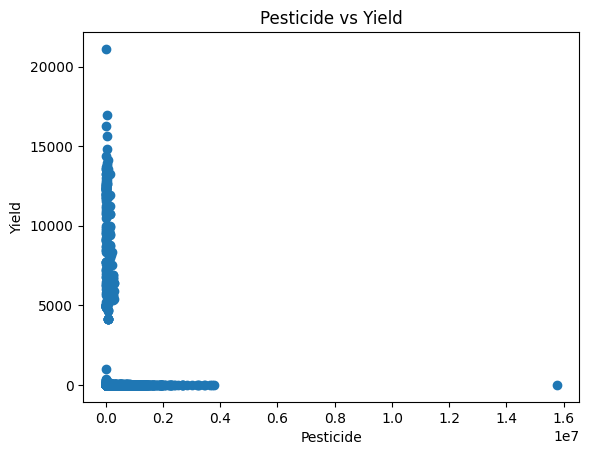

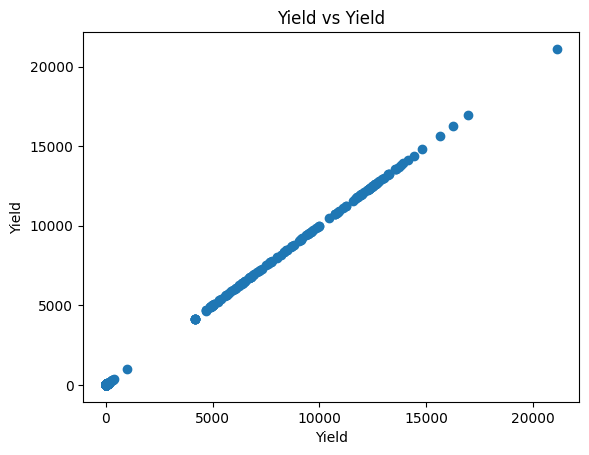

In [17]:
for i in data.columns:
    if data[i].dtypes=='float64':
        plt.scatter(data[i],data['Yield'])
        plt.title(f'{i} vs Yield')
        plt.xlabel(i)
        plt.ylabel('Yield')
        plt.show()

From this we can see that:
- If the **Annual Rainfall** is between 800mm to 2200mm the **Yield** is maximum.
- We cannot see a significant relationship here.

In [18]:
continous=[i for i in data.columns if data[i].dtypes in ['float64','int64'] if i not in ['Yield','Crop_Year']]

In [19]:
continous

['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']

## **Outliers** in the dataset

In [20]:
data.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19577.000000,1.957700e+04,1.957700e+04,19577.000000,1.957700e+04,1.957700e+04,19577.000000
mean,2009.117945,1.809265e+05,1.652997e+07,1438.450010,2.423721e+07,4.911903e+04,80.411426
std,6.499877,7.348001e+05,2.638053e+08,816.525914,9.520033e+07,2.138658e+05,880.794251
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.003571
25%,2004.000000,1.439000e+03,1.448000e+03,940.700000,1.935634e+05,3.696300e+02,0.604348
50%,2010.000000,9.501000e+03,1.408200e+04,1247.600000,1.258710e+06,2.473450e+03,1.037273
75%,2015.000000,7.599300e+04,1.244600e+05,1643.700000,1.013409e+07,2.021619e+04,2.410000
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


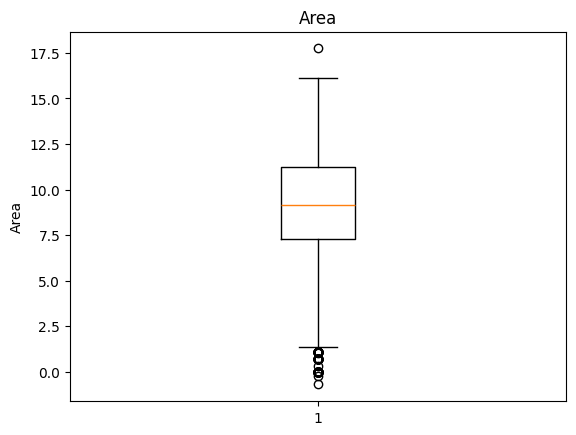

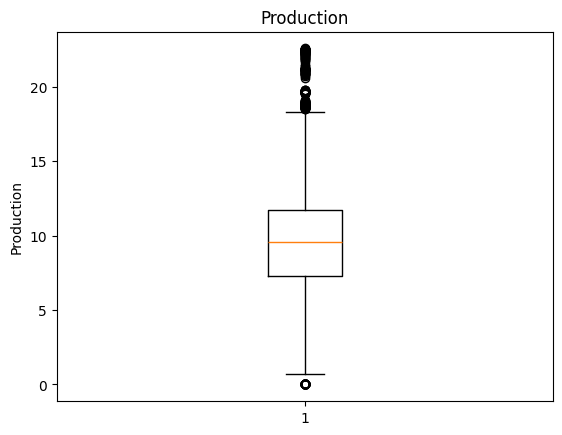

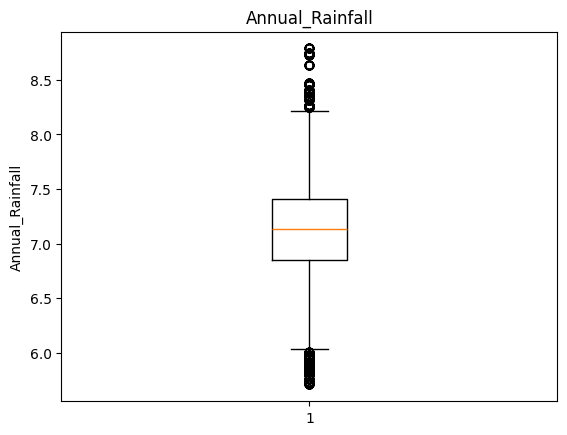

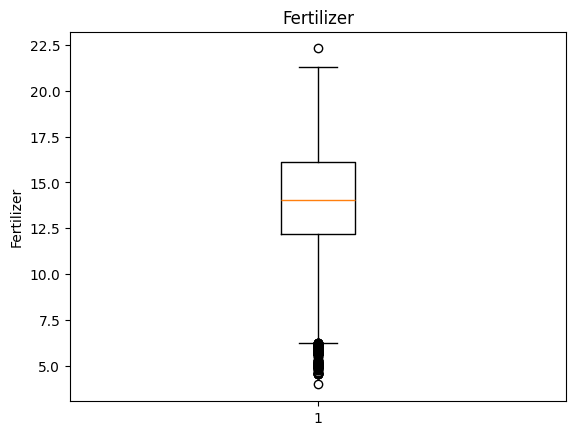

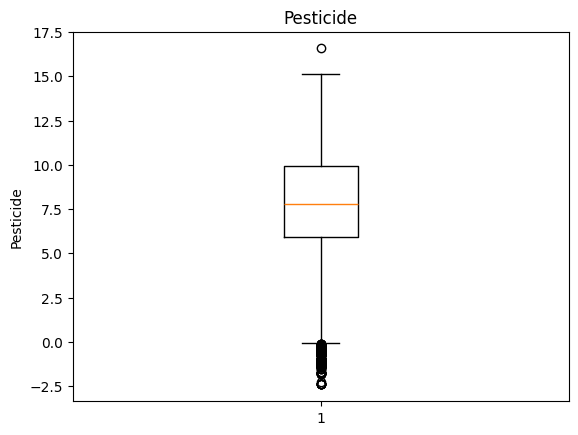

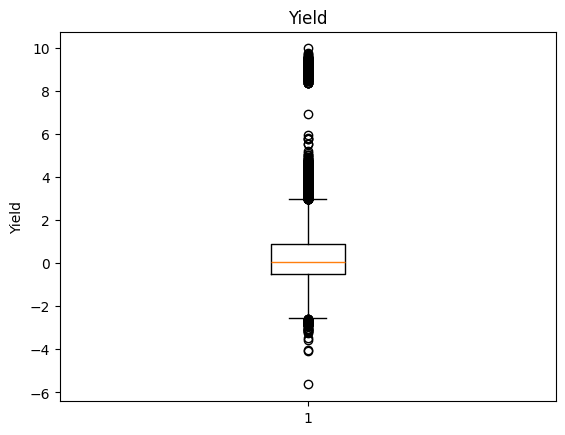

In [21]:
for i in continous+['Yield']:
    df=data.copy()
    df[i]=np.log(df[i])
    plt.boxplot(df[i])
    plt.title(i)
    plt.ylabel(i)
    plt.show()

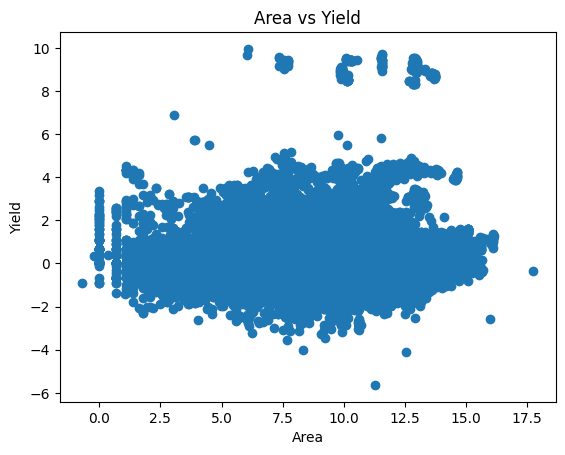

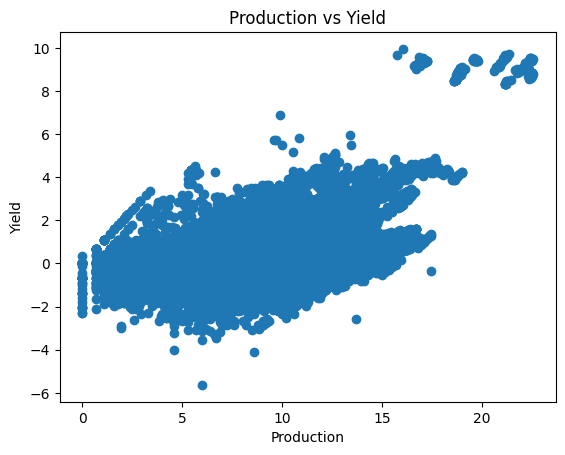

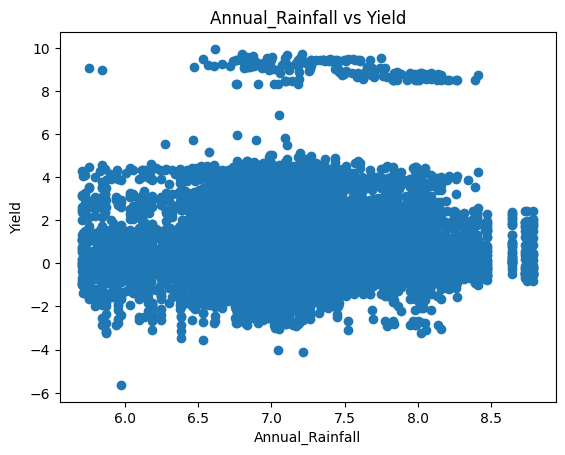

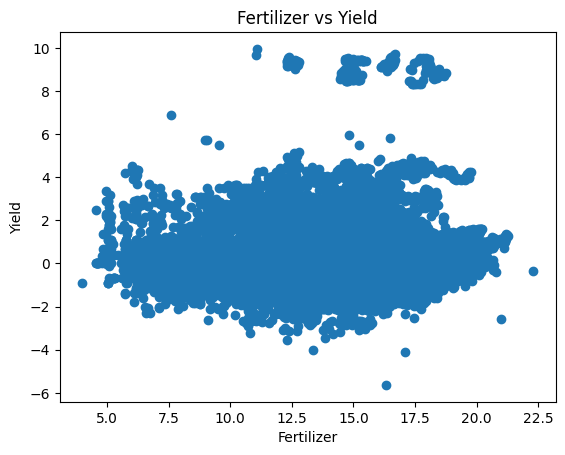

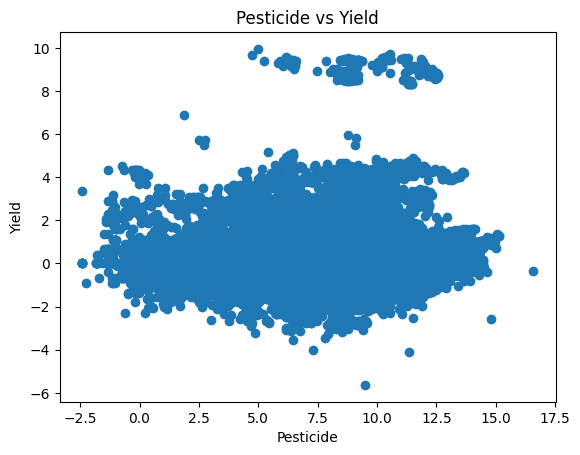

In [22]:
for i in continous:
    df=data.copy()
    df[i]=np.log(df[i])
    df['Yield']=np.log(df['Yield'])
    plt.scatter(df[i],df['Yield'])
    plt.title(f'{i} vs Yield')
    plt.xlabel(i)
    plt.ylabel('Yield')
    plt.show()

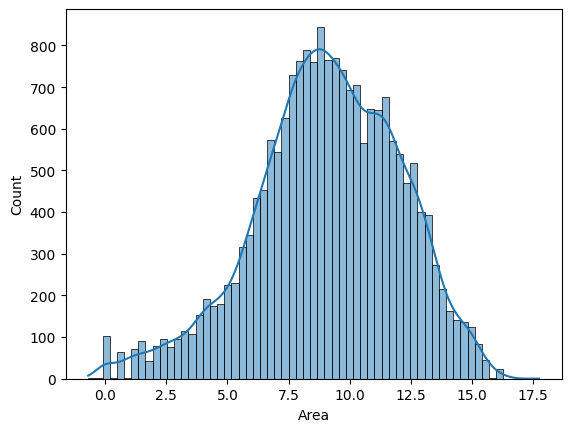

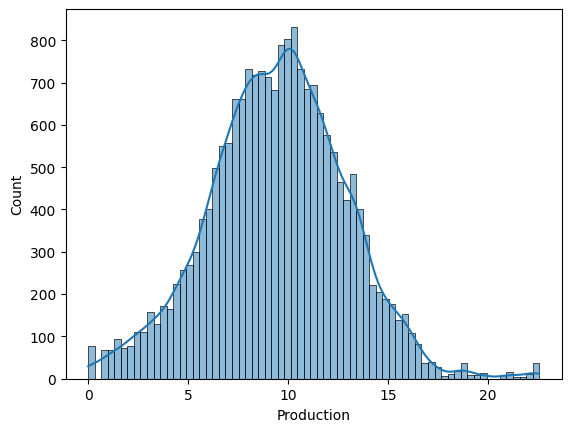

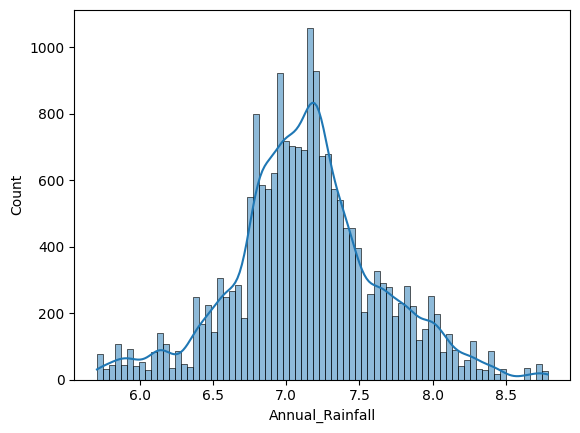

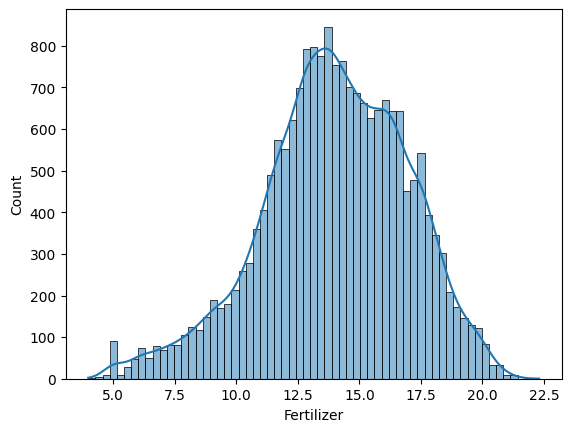

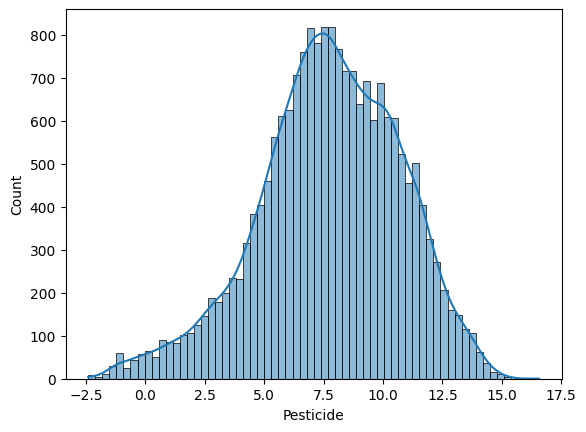

In [23]:
for i in continous:
    df=data.copy()
    df[i]=np.log(df[i])
    sns.histplot(df[i],kde=True)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

We can see that after appling **Log Transformation** the data is **Normally Distributed**.

In [24]:
df=data.copy()

# Transformation of Dataset

In [25]:
#Log Transformation of Dataset
df[continous]=np.log(data[continous])

In [26]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,11.209304,10.945671,7.626278,15.764968,10.038121,0.796087
1,Arhar/Tur,1997,Kharif,Assam,8.800415,8.452121,7.626278,13.356080,7.629232,0.710435
2,Castor seed,1997,Kharif,Assam,6.679599,3.091042,7.626278,11.235264,5.508416,0.238333
3,Coconut,1997,Whole Year,Assam,9.886138,18.658949,7.626278,14.441803,8.714955,5238.051739
4,Cotton(lint),1997,Kharif,Assam,7.461066,6.677083,7.626278,12.016730,6.289883,0.420909


#### Changing names of Rare Crops

In [27]:
crop=((data['Crop'].value_counts()/data.shape[0])*100)
rare_crop=[i for i,j in zip(crop.index,crop) if j<1.0]

In [28]:
#Changing the Name of Crops Less than 1% to Rare
df['Crop']=np.where(df["Crop"].isin(rare_crop),'rare',df['Crop'])

In [29]:
df['Crop'].value_counts()

Crop
rare                     2015
Rice                     1197
Maize                     974
Moong(Green Gram)         734
Urad                      730
Groundnut                 725
Sesamum                   684
Potato                    627
Sugarcane                 605
Wheat                     543
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      489
Small millets             484
Cotton(lint)              473
Onion                     447
Sunflower                 440
Dry chillies              419
Other Kharif pulses       379
Peas & beans (Pulses)     369
Horse-gram                365
Tobacco                   362
Other  Rabi pulses        354
Soyabean                  345
Turmeric                  334
Masoor                    324
Ginger                    321
Linseed                   306
Castor seed               300
Barley                    297
Sweet

In [30]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,rare,1997,Whole Year,Assam,11.209304,10.945671,7.626278,15.764968,10.038121,0.796087
1,Arhar/Tur,1997,Kharif,Assam,8.800415,8.452121,7.626278,13.356080,7.629232,0.710435
2,Castor seed,1997,Kharif,Assam,6.679599,3.091042,7.626278,11.235264,5.508416,0.238333
3,rare,1997,Whole Year,Assam,9.886138,18.658949,7.626278,14.441803,8.714955,5238.051739
4,Cotton(lint),1997,Kharif,Assam,7.461066,6.677083,7.626278,12.016730,6.289883,0.420909


In [31]:
df[['Area','Production','Annual_Rainfall','Fertilizer','Pesticide','Yield']].corr()

,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Area,1.000000,0.898707,-0.226799,0.997648,0.993942,0.050496
Production,0.898707,1.000000,-0.178076,0.898493,0.894981,0.269267
Annual_Rainfall,-0.226799,-0.178076,1.000000,-0.226973,-0.223767,0.026737
Fertilizer,0.997648,0.898493,-0.226973,1.000000,0.993390,0.050879
Pesticide,0.993942,0.894981,-0.223767,0.993390,1.000000,0.050231
Yield,0.050496,0.269267,0.026737,0.050879,0.050231,1.000000


### Droping Highly Correlated Columns

In [32]:
df.drop('Pesticide',axis=1,inplace=True)

In [33]:
df[['Area','Production','Annual_Rainfall','Fertilizer','Yield']].corr()

,Area,Production,Annual_Rainfall,Fertilizer,Yield
Area,1.000000,0.898707,-0.226799,0.997648,0.050496
Production,0.898707,1.000000,-0.178076,0.898493,0.269267
Annual_Rainfall,-0.226799,-0.178076,1.000000,-0.226973,0.026737
Fertilizer,0.997648,0.898493,-0.226973,1.000000,0.050879
Yield,0.050496,0.269267,0.026737,0.050879,1.000000


In [34]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Yield
0,rare,1997,Whole Year,Assam,11.209304,10.945671,7.626278,15.764968,0.796087
1,Arhar/Tur,1997,Kharif,Assam,8.800415,8.452121,7.626278,13.356080,0.710435
2,Castor seed,1997,Kharif,Assam,6.679599,3.091042,7.626278,11.235264,0.238333
3,rare,1997,Whole Year,Assam,9.886138,18.658949,7.626278,14.441803,5238.051739
4,Cotton(lint),1997,Kharif,Assam,7.461066,6.677083,7.626278,12.016730,0.420909


### Applying Frequency Encoding as there is High Cardinality in Crop and State Column

In [35]:
crop_frequency=df['Crop'].value_counts().to_dict()

In [36]:
df['Crop']=df['Crop'].map(crop_frequency)

In [37]:
state_frequency=df['State'].value_counts().to_dict()

In [38]:
df['State']=df['State'].map(state_frequency)

In [39]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Yield
0,2015,1997,Whole Year,731,11.209304,10.945671,7.626278,15.764968,0.796087
1,508,1997,Kharif,731,8.800415,8.452121,7.626278,13.356080,0.710435
2,300,1997,Kharif,731,6.679599,3.091042,7.626278,11.235264,0.238333
3,2015,1997,Whole Year,731,9.886138,18.658949,7.626278,14.441803,5238.051739
4,473,1997,Kharif,731,7.461066,6.677083,7.626278,12.016730,0.420909


In [40]:
df.drop('Season',axis=1).corr()

,Crop,Crop_Year,State,Area,Production,Annual_Rainfall,Fertilizer,Yield
Crop,1.000000,0.020410,0.008675,0.095728,0.091559,0.067891,0.097299,0.223213
Crop_Year,0.020410,1.000000,-0.048042,-0.105148,-0.063756,0.016910,-0.043140,0.002681
State,0.008675,-0.048042,1.000000,0.283578,0.224688,-0.204133,0.282368,0.030430
Area,0.095728,-0.105148,0.283578,1.000000,0.898707,-0.226799,0.997648,0.050496
Production,0.091559,-0.063756,0.224688,0.898707,1.000000,-0.178076,0.898493,0.269267
Annual_Rainfall,0.067891,0.016910,-0.204133,-0.226799,-0.178076,1.000000,-0.226973,0.026737
Fertilizer,0.097299,-0.043140,0.282368,0.997648,0.898493,-0.226973,1.000000,0.050879
Yield,0.223213,0.002681,0.030430,0.050496,0.269267,0.026737,0.050879,1.000000


### One Hot Encoding of Season Column

In [41]:
df_enc=pd.get_dummies(data=df,columns=['Season'],drop_first=True,dtype='int64')

In [42]:
df_enc.drop('Crop_Year',axis=1,inplace=True)

In [43]:
df_enc.head()

,Crop,State,Area,Production,Annual_Rainfall,Fertilizer,Yield,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,2015,731,11.209304,10.945671,7.626278,15.764968,0.796087,0,0,0,1,0
1,508,731,8.800415,8.452121,7.626278,13.356080,0.710435,1,0,0,0,0
2,300,731,6.679599,3.091042,7.626278,11.235264,0.238333,1,0,0,0,0
3,2015,731,9.886138,18.658949,7.626278,14.441803,5238.051739,0,0,0,1,0
4,473,731,7.461066,6.677083,7.626278,12.016730,0.420909,1,0,0,0,0


# Model Training

### Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_enc.drop('Yield',axis=1),df_enc['Yield'],random_state=123,train_size=0.7)

### Scaling of the Dataset

In [45]:
from sklearn.preprocessing import MinMaxScaler
x_mms=MinMaxScaler()

In [46]:
X_train.describe()

,Crop,State,Area,Production,Annual_Rainfall,Fertilizer,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
count,13703.000000,13703.000000,13703.000000,1.370300e+04,13703.000000,13703.000000,13703.000000,13703.000000,13703.000000,13703.000000,13703.000000
mean,706.159381,783.840327,9.064814,-inf,7.141132,13.965666,0.414289,0.293658,0.061884,0.187915,0.019631
std,501.950558,299.340569,2.991086,NaN,0.504431,2.977143,0.492617,0.455454,0.240954,0.390659,0.138733
min,198.000000,203.000000,0.000000,-inf,5.708106,4.550397,0.000000,0.000000,0.000000,0.000000,0.000000
25%,369.000000,615.000000,7.254178,7.255591e+00,6.846624,12.163916,0.000000,0.000000,0.000000,0.000000,0.000000
50%,524.000000,763.000000,9.155567,9.564512e+00,7.128977,14.029263,0.000000,0.000000,0.000000,0.000000,0.000000
75%,730.000000,893.000000,11.253727,1.173209e+01,7.404705,16.135116,1.000000,1.000000,0.000000,0.000000,0.000000
max,2015.000000,1430.000000,17.743566,2.256793e+01,8.787632,22.299231,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
X_test.describe()

,Crop,State,Area,Production,Annual_Rainfall,Fertilizer,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
count,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000
mean,709.445182,783.081205,9.116134,-inf,7.141419,14.017396,0.426626,0.290773,0.058733,0.185734,0.020429
std,505.861276,299.446563,2.917041,NaN,0.502657,2.906200,0.494629,0.454158,0.235145,0.388925,0.141475
min,198.000000,203.000000,-0.693147,-inf,5.708106,3.992127,0.000000,0.000000,0.000000,0.000000,0.000000
25%,369.000000,615.000000,7.310383,7.330569,6.846624,12.196553,0.000000,0.000000,0.000000,0.000000,0.000000
50%,524.000000,763.000000,9.172119,9.536618,7.128977,14.086468,0.000000,0.000000,0.000000,0.000000,0.000000
75%,734.000000,893.000000,11.216656,11.725621,7.407439,16.115128,1.000000,1.000000,0.000000,0.000000,0.000000
max,2015.000000,1430.000000,16.103581,22.465310,8.787632,21.193723,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
X_train['Production']=np.where(np.isinf(X_train['Production']),np.percentile(X_train['Production'],75),X_train['Production'])

In [49]:
X_test['Production']=np.where(np.isinf(X_test['Production']),np.percentile(X_test['Production'],75),X_test['Production'])

In [50]:
x_mms.fit(X_train)
X_train_mms=x_mms.transform(X_train)
X_test_mms=x_mms.transform(X_test)

In [51]:
X_train_mms=pd.DataFrame(X_train_mms,columns=X_train.columns)
X_test_mms=pd.DataFrame(X_test_mms,columns=X_test.columns)

## Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [53]:
lr.fit(X_train_mms,y_train)

LinearRegression()

In [54]:
lr_pred=lr.predict(X_test_mms)

### Evaluation Metrics

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, median_absolute_error, explained_variance_score, max_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, lr_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lr_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2)
r_squared = r2_score(y_test, lr_pred)
print("R-squared (R2):", r_squared)

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, lr_pred)
print("Median Absolute Error (MedAE):", medae)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, lr_pred)
print("Explained Variance Score:", explained_variance)

# Calculate Maximum Error (Max Error)
max_err = max_error(y_test, lr_pred)
print("Maximum Error (Max Error):", max_err)

Mean Absolute Error (MAE): 347.8123613869137
Mean Squared Error (MSE): 671475.171746753
Root Mean Squared Error (RMSE): 819.4358862941951
R-squared (R2): 0.3159996917180036
Median Absolute Error (MedAE): 241.92720751006954
Explained Variance Score: 0.31610920362158723
Maximum Error (Max Error): 17912.829972095835


### Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score
print('Mean Cross Val Score :',cross_val_score(lr,X_train,y_train,cv=10,scoring='r2').mean())
print('Minimum Cross Val Score :',cross_val_score(lr,X_train,y_train,cv=10,scoring='r2').min())
print('Maximum Cross Val Score :',cross_val_score(lr,X_train,y_train,cv=10,scoring='r2').max())

Mean Cross Val Score : 0.2789047481048065
Minimum Cross Val Score : 0.15274003599521568
Maximum Cross Val Score : 0.3672708606658963


## Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_jobs=-1,n_estimators=500,random_state=123)

In [58]:
rf.fit(X_train_mms,y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=123)

In [59]:
rf_pred=rf.predict(X_test_mms)

### Evaluation Metrics

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, median_absolute_error, explained_variance_score, max_error
lr_pred=rf_pred.copy()
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, lr_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lr_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2)
r_squared = r2_score(y_test, lr_pred)
print("R-squared (R2):", r_squared)

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, lr_pred)
print("Median Absolute Error (MedAE):", medae)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, lr_pred)
print("Explained Variance Score:", explained_variance)

# Calculate Maximum Error (Max Error)
max_err = max_error(y_test, lr_pred)
print("Maximum Error (Max Error):", max_err)

Mean Absolute Error (MAE): 16.122504540564005
Mean Squared Error (MSE): 145371.02902712405
Root Mean Squared Error (RMSE): 381.27552901690933
R-squared (R2): 0.8519173413200669
Median Absolute Error (MedAE): 0.08053967117599983
Explained Variance Score: 0.8520639329232131
Maximum Error (Max Error): 21087.351608180757


### Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf,X_train,y_train,cv=10,scoring='r2')
print('Mean Cross Val Score :',scores.mean())
print('Minimum Cross Val Score :',scores.min())
print('Maximum Cross Val Score :',scores.max())

Mean Cross Val Score : 0.9785481923171113
Minimum Cross Val Score : 0.9144682367806901
Maximum Cross Val Score : 0.9959180970037814


## Ridge Regression

In [61]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [62]:
ridge.fit(X_train_mms,y_train)

Ridge()

In [64]:
ridge_pred=ridge.predict(X_test_mms)

### Evaluation Metrics

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, median_absolute_error, explained_variance_score, max_error
lr_pred=ridge_pred.copy()
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, lr_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lr_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2)
r_squared = r2_score(y_test, lr_pred)
print("R-squared (R2):", r_squared)

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, lr_pred)
print("Median Absolute Error (MedAE):", medae)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, lr_pred)
print("Explained Variance Score:", explained_variance)

# Calculate Maximum Error (Max Error)
max_err = max_error(y_test, lr_pred)
print("Maximum Error (Max Error):", max_err)

Mean Absolute Error (MAE): 343.0964819982891
Mean Squared Error (MSE): 673295.7359957092
Root Mean Squared Error (RMSE): 820.5459987080001
R-squared (R2): 0.314145168185445
Median Absolute Error (MedAE): 238.0151540101284
Explained Variance Score: 0.31425694564796647
Maximum Error (Max Error): 17978.16773906534
